In [11]:
# 读取labelme标注的json文件

运行可查看标注效果：`labelme_draw_json snap.json`


![](https://enpei-md.oss-cn-hangzhou.aliyuncs.com/img202308051143867.png?x-oss-process=style/resize)

In [1]:
import cv2
import numpy as np
import json
import matplotlib.pyplot as plt

In [5]:
json_file = "./proj2_snap.json"
snap_file =  "./proj2_snap.png"

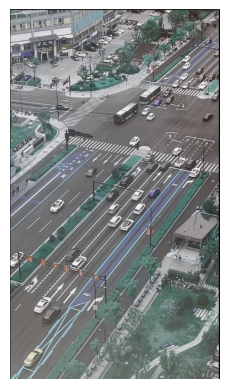

In [6]:
snap_img = cv2.imread(snap_file)
plt.imshow(snap_img)
plt.axis('off')
plt.show()

In [3]:
# 读取json文件
with open(json_file, 'r') as f:
    area_json = json.load(f)
    shapes = area_json['shapes']

    mask_overlay = []
    line = []
    for shape in shapes:
        if shape['shape_type'] == 'line':
            start_pt, end_pt = shape['points'][0],shape['points'][1]
            line.append(start_pt)
            line.append(end_pt)
        else:
            mask_overlay.append(shape['points'])
    print(mask_overlay)
    print(line)

[[[4.724719101123583, 195.69662921348316], [194.6123595505618, 226.03370786516854], [317.08426966292143, 201.31460674157304], [451.9157303370787, 102.43820224719103], [557.5337078651685, 3.561797752809006], [1.1368683772161603e-13, 1.3227065565633502]], [[3.601123595505669, 268.7303370786517], [120.45505617977528, 294.5730337078652], [155.28651685393265, 344.0112359550562], [72.14044943820227, 414.7977528089888], [1.353932584269728, 474.34831460674155]], [[563.1516853932585, 470.97752808988764], [188.994382022472, 1001.314606741573], [556.4101123595506, 1003.561797752809]]]
[[139.55617977528095, 361.9887640449438], [563.1516853932585, 446.2584269662921]]


In [7]:
mask_overlay

[[[4.724719101123583, 195.69662921348316],
  [194.6123595505618, 226.03370786516854],
  [317.08426966292143, 201.31460674157304],
  [451.9157303370787, 102.43820224719103],
  [557.5337078651685, 3.561797752809006],
  [1.1368683772161603e-13, 1.3227065565633502]],
 [[3.601123595505669, 268.7303370786517],
  [120.45505617977528, 294.5730337078652],
  [155.28651685393265, 344.0112359550562],
  [72.14044943820227, 414.7977528089888],
  [1.353932584269728, 474.34831460674155]],
 [[563.1516853932585, 470.97752808988764],
  [188.994382022472, 1001.314606741573],
  [556.4101123595506, 1003.561797752809]]]

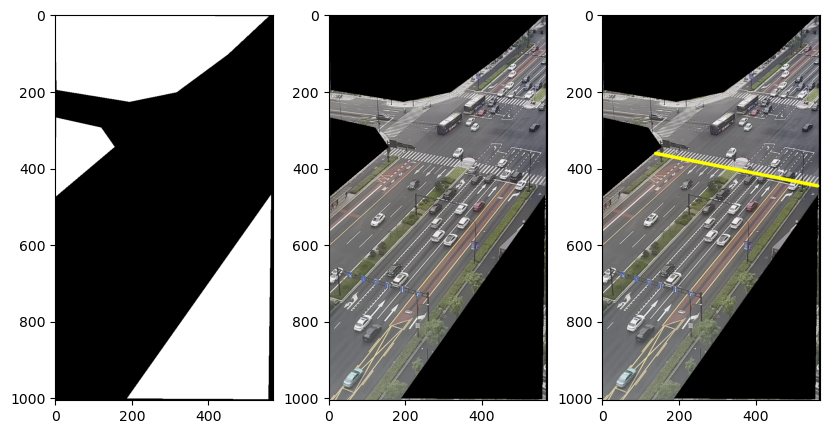

In [19]:
snap_img_cp = snap_img.copy()
# mask_area
vertices_list = [np.array(i, np.int32) for i in mask_overlay]
mask = np.zeros_like(snap_img_cp)
# every area fill white
for v in vertices_list:
    cv2.fillPoly(mask, [v], (255, 255, 255))

fig,axes = plt.subplots(1, 3, figsize=(10, 5)) 
axes[0].imshow(mask[:, :, ::-1])  # revert channel
res_ = cv2.bitwise_and(snap_img_cp, cv2.bitwise_not(mask))
axes[1].imshow(res_[:, :, ::-1])

# plot line
line = np.array(line, np.int32)
_ = cv2.line(res_, line[0], line[1], (0, 255, 255), 8)
axes[2].imshow(res_[:, :, ::-1])
plt.show()

# cross 

In [31]:
from shapely.geometry import Polygon, LineString

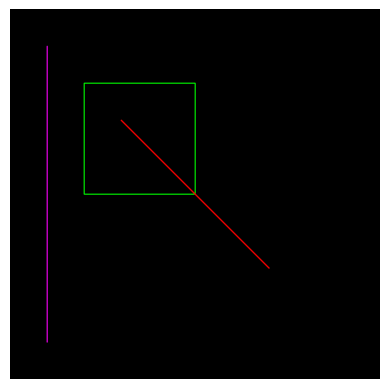

True False


In [33]:
img = np.zeros((1000, 1000, 3), dtype=np.uint8)
l, t, r, b = 200, 200, 500, 500
# line 
x1, x2, y1, y2 = 300, 700, 300, 700
k1, k2, b1, b2 = 100, 100, 100, 900

# plot 
cv2.rectangle(img, (l, t), (r, b), (0, 255, 0), 2)
cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.line(img, (k1, b1), (k2, b2), (255, 0, 255), 2)

plt.imshow(img[..., ::-1])
plt.axis('off')
plt.show()

rect = Polygon([(l, t), (r, t), (r, b), (l, b)])
line = LineString([(x1, y1), (x2, y2)])
line2 = LineString([ (k1, b1), (k2, b2)])
print(line.intersects(rect), line2.intersects(rect))